In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
datapath = "../../../../deeplearning/TensorFlow2.0_ResNet/dataset/"
print(os.path.exists(datapath))
image_dims = (224, 224)
batch_size = 400

True


In [3]:
# for testing the model only one test generator is required
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(os.path.join(datapath, "test"), 
                                                             target_size = image_dims,
                                                              batch_size = batch_size,
                                                             class_mode = 'categorical', 
                                                             color_mode = 'rgb')

Found 495 images belonging to 2 classes.


In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

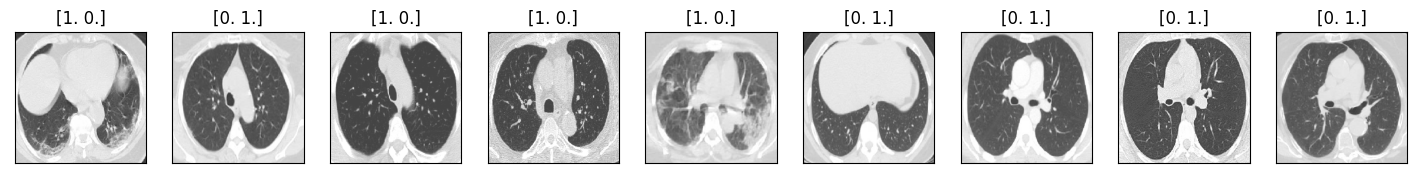

In [6]:
n = 10
plt.figure(figsize=(20, 4))
xtest, ytest = next(test_generator)
for i in range(1, n):
    ax = plt.subplot(1, n, i)
    plt.imshow(xtest[i])
    ax.title.set_text(ytest[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [8]:
import pandas as pd
from sklearn.metrics import recall_score ,precision_score,accuracy_score, f1_score,roc_auc_score

In [9]:
def binary_classification_performance(y_test, y_pred):
    tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
    accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_test),2)
    precision = round(precision_score(y_pred = y_pred, y_true = y_test),2)
    recall = round(recall_score(y_pred = y_pred, y_true = y_test),2)
    f1_score = round(2*precision*recall/(precision + recall),2)
    specificity = round(tn/(tn+fp),2)
    npv = round(tn/(tn+fn),2)
    auc_roc = round(roc_auc_score(y_score = y_pred, y_true = y_test),2)


    result = pd.DataFrame({'Accuracy' : [accuracy],
                         'Precision (or PPV)' : [precision],
                         'Recall (senitivity or TPR)' : [recall],
                         'f1 score' : [f1_score],
                         'AUC_ROC' : [auc_roc],
                         'Specificty (or TNR)': [specificity],
                         'NPV' : [npv],
                         'True Positive' : [tp],
                         'True Negative' : [tn],
                         'False Positive':[fp],
                         'False Negative':[fn]})
    return result

## load the vgg19 model - Output 1

In [10]:
import tensorflow as tf
import keras

In [11]:
vgg19 = tf.keras.models.load_model('models/test1/vgg19')

In [12]:
xtest, ytest = next(test_generator)
ypredict = vgg19.predict(xtest)

In [13]:
ypredict[ypredict >=0.7] = 1.0
ypredict[ypredict < 0.7] = 0.0

In [14]:
y_pred = np.empty(len(ypredict))
y_test = np.empty(len(ytest))
for i in range(0, len(ytest)):
    if (ytest[i, 0] == 0 and  ytest[i, 1] == 1) : y_test[i] = 0
    if (ytest[i, 0] == 1 and  ytest[i, 1] == 0) : y_test[i] = 1
    if (ypredict[i, 0] == 0 and  ypredict[i, 1] == 1) : y_pred[i] = 0
    if (ypredict[i, 0] == 1 and  ypredict[i, 1] == 0) : y_pred[i] = 1

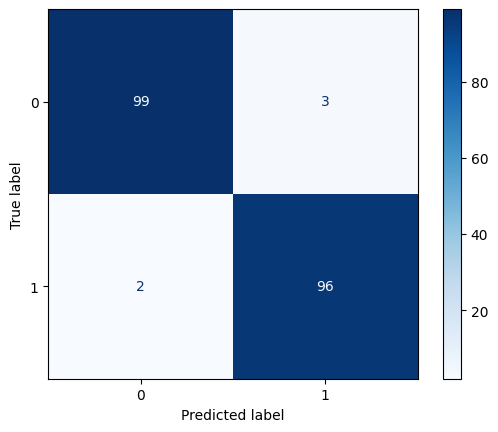

In [15]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [16]:
binary_classification_performance(y_test, y_pred)

,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.98,0.97,0.98,0.97,0.98,0.97,0.98,99,96,3,2


## load the denseNet 169 Output 2

In [17]:
densenet_1 = tf.keras.models.load_model('models/test1/densenet-1000')

In [22]:
xtest, ytest = next(test_generator)
ypredict = densenet_1.predict(xtest)

In [23]:
ypredict[ypredict >=0.7] = 1.0
ypredict[ypredict < 0.7] = 0.0

In [24]:
y_pred = np.empty(len(ypredict))
y_test = np.empty(len(ytest))
for i in range(0, len(ytest)):
    if (ytest[i, 0] == 0 and  ytest[i, 1] == 1) : y_test[i] = 0
    if (ytest[i, 0] == 1 and  ytest[i, 1] == 0) : y_test[i] = 1
    if (ypredict[i, 0] == 0 and  ypredict[i, 1] == 1) : y_pred[i] = 0
    if (ypredict[i, 0] == 1 and  ypredict[i, 1] == 0) : y_pred[i] = 1

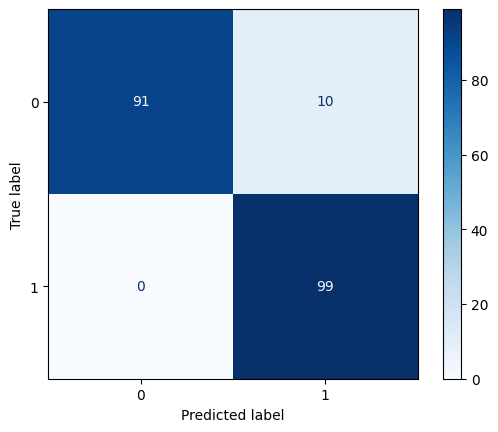

In [25]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [26]:
binary_classification_performance(y_test, y_pred)

,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.95,0.91,1.0,0.95,0.95,0.91,1.0,91,99,10,0


## Load the densenet169 - Model 3 Output

In [13]:
densenet_2 = tf.keras.models.load_model('models/test1/densenet-1000-500-200')

In [15]:
xtest, ytest = next(test_generator)
ypredict = densenet_2.predict(xtest)

In [16]:
ypredict[ypredict >=0.5] = 1.0
ypredict[ypredict < 0.5] = 0.0

In [17]:
y_pred = np.empty(len(ypredict))
y_test = np.empty(len(ytest))
for i in range(0, len(ytest)):
    if (ytest[i, 0] == 0 and  ytest[i, 1] == 1) : y_test[i] = 0
    if (ytest[i, 0] == 1 and  ytest[i, 1] == 0) : y_test[i] = 1
    if (ypredict[i, 0] == 0 and  ypredict[i, 1] == 1) : y_pred[i] = 0
    if (ypredict[i, 0] == 1 and  ypredict[i, 1] == 0) : y_pred[i] = 1

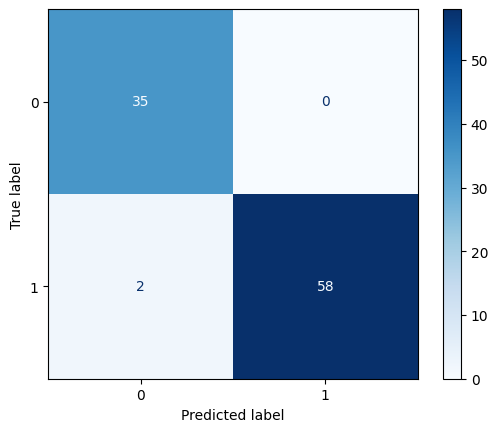

In [18]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [19]:
binary_classification_performance(y_test, y_pred)

,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.98,1.0,0.97,0.98,0.98,1.0,0.97,35,58,0,2


## Loading the Ensembled model - Final

In [11]:
ensembled = tf.keras.models.load_model('models/test1/ensembled-avg')

In [17]:
xtest, ytest = next(test_generator)
ypredict = ensembled.predict(xtest)

In [18]:
ypredict[ypredict >=0.5] = 1.0
ypredict[ypredict < 0.5] = 0.0

In [19]:
y_pred = np.empty(len(ypredict))
y_test = np.empty(len(ytest))
for i in range(0, len(ytest)):
    if (ytest[i, 0] == 0 and  ytest[i, 1] == 1) : y_test[i] = 0
    if (ytest[i, 0] == 1 and  ytest[i, 1] == 0) : y_test[i] = 1
    if (ypredict[i, 0] == 0 and  ypredict[i, 1] == 1) : y_pred[i] = 0
    if (ypredict[i, 0] == 1 and  ypredict[i, 1] == 0) : y_pred[i] = 1

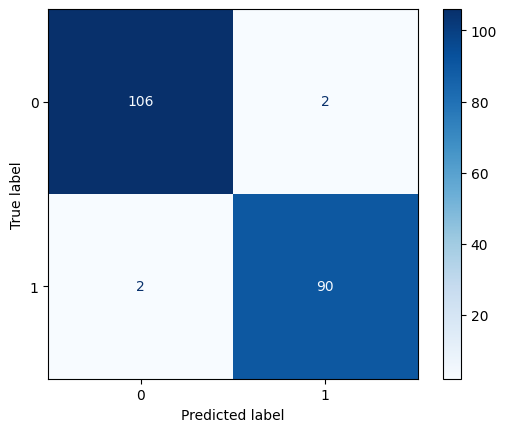

In [20]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [21]:
binary_classification_performance(y_test, y_pred)

,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.98,0.98,0.98,0.98,0.98,0.98,0.98,106,90,2,2
